<a href="https://colab.research.google.com/github/AdityaJ7/The-Sparks-Foundation-Intern/blob/master/Task_1/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Task 1- Prediction using Supervised ML**

Author - Aditya Jetely



# Problem Statement
Predict the percentage of marks of an student based on the number of
study hours

# Understand the data

**Hours**: No of study hours

**Marks**: Percentage of marks obtained 

# Read data



In [ ]:
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Data Exploration

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
X = df['Hours']  # Independent variable 
y = df['Scores']  # Dependent variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcd6aa3f518>,
      dtype=object)

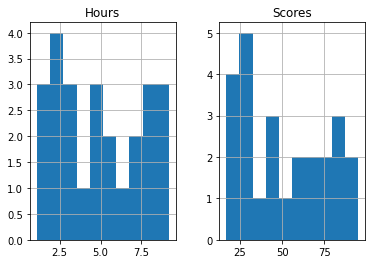

In [ ]:
df.hist()

# Relation between X and y

In [ ]:
import matplotlib.pyplot as plt

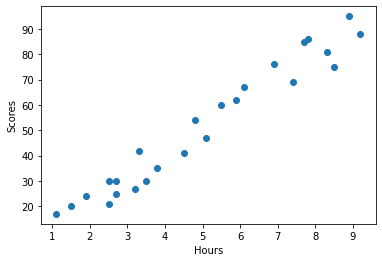

In [ ]:
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

This plot confirms that the variables in our dataset share a linear relation.

# Train-Test Split

Lets split our data into train and test with the help of numpy

In [ ]:
import numpy as np

In [ ]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]

# Simple Linear Regression Model

In [ ]:
from sklearn import linear_model

In [ ]:
model = linear_model.LinearRegression()

In [ ]:
X_train = np.asanyarray(train[['Hours']])
y_train = np.asanyarray(train[['Scores']])

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f"The coefficient is {model.coef_[0][0]}")


The coefficient is 9.892200353881378


In [ ]:
print(f"The intercept is {model.intercept_[0]}")

The intercept is 1.475152831470261


The coefficient and the intercept are the parameters in the fit line. The fit line is what will help us in the prediction.

# Plotting the fit line over the train data

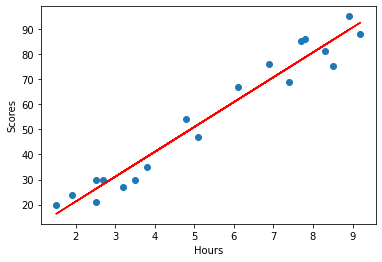

In [ ]:
plt.scatter(train['Hours'], train['Scores'])
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# Evaluation

In [ ]:
from sklearn.metrics import r2_score

X_test = np.asanyarray(test[['Hours']])
y_test = np.asanyarray(test[['Scores']])
y_test_predicted = model.predict(X_test)

print(f"Mean absolute error: {np.mean(np.absolute(y_test_predicted - y_test))}")
print(f"Residual sum of squares (MSE): {np.mean((y_test_predicted - y_test) ** 2)}") 
print(f"R2-score: {r2_score(y_test_predicted , y_test)}")

Mean absolute error: 4.496128548946604
Residual sum of squares (MSE): 23.38821799642393
R2-score: 0.9132634479589752


Our model has a pretty decent R2 score

# Question: What will be predicted score if a student studies for 9.25 hrs/ day?

Lets answer this with the help of our model

In [ ]:
hours = np.asanyarray([9.25])
predicted_score = model.predict(hours.reshape(-1,1))
print(f"The predicted score for 9.25 hours is {predicted_score[0][0]}")

The predicted score for 9.25 hours is 92.978006104873
